In [1]:
# import base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
df = pd.read_csv('credit risk.csv')
df

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [3]:
df= df.drop('clientid',axis=1)
df

,income,age,loan,default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.044874,48.518179,1926.729397,0
1996,69516.127573,23.162104,3503.176156,0
1997,44311.449262,28.017167,5522.786693,1
1998,43756.056605,63.971796,1622.722598,0


# EDA

<Axes: xlabel='default', ylabel='count'>

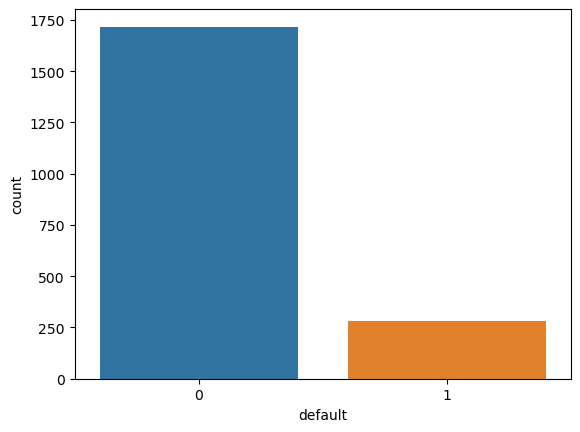

In [4]:
sns.countplot(df,x='default')

In [5]:
df.corr()

,income,age,loan,default
income,1.000000,-0.033687,0.441117,0.002284
age,-0.033687,1.000000,0.002309,-0.429759
loan,0.441117,0.002309,1.000000,0.377160
default,0.002284,-0.429759,0.377160,1.000000


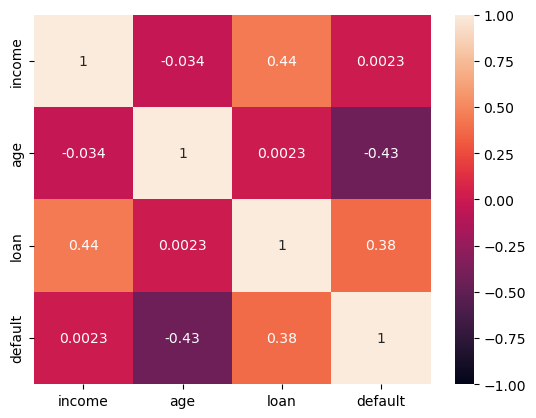

In [6]:
sns.heatmap(df.corr(),annot=True,vmax = 1,vmin=-1)
plt.show()

array([[<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'loan'}>,
        <Axes: title={'center': 'default'}>]], dtype=object)

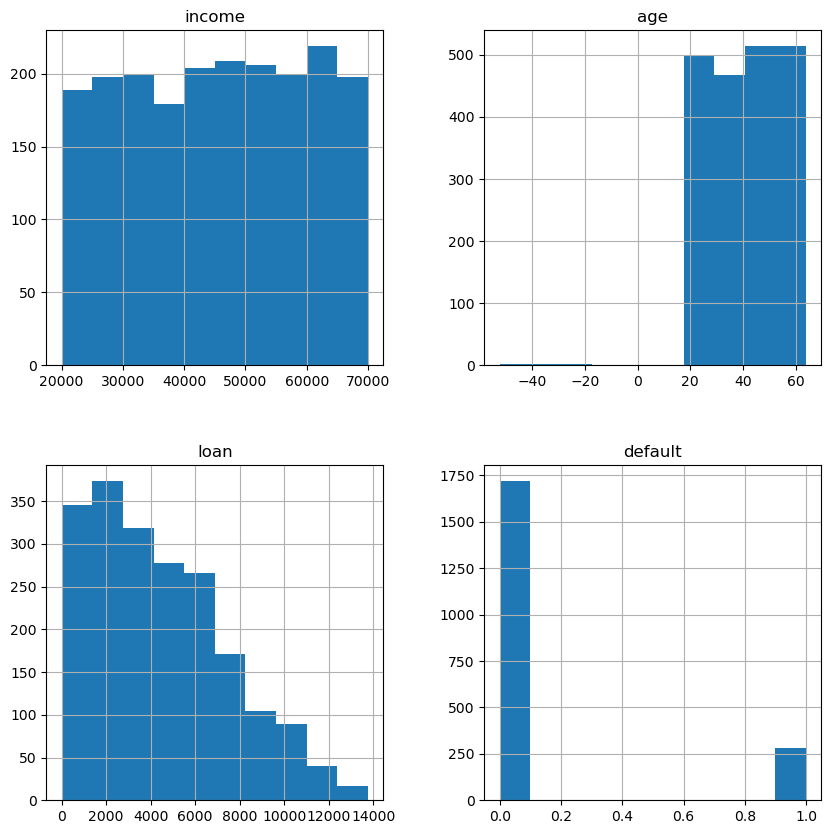

In [7]:
df.hist(figsize=(10,10))

In [8]:
#Checking Missing Value
df.isna().sum()

income     0
age        3
loan       0
default    0
dtype: int64

In [9]:
# Filling in Missing value
df=df.fillna(method='bfill')
df.isna().sum()

income     0
age        0
loan       0
default    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   income   2000 non-null   float64
 1   age      2000 non-null   float64
 2   loan     2000 non-null   float64
 3   default  2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


In [11]:
df.describe()

,income,age,loan,default
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.811735,4444.369695,0.141500
std,14326.327119,13.617954,3045.410024,0.348624
min,20014.489470,-52.423280,1.377630,0.000000
25%,32796.459717,29.012888,1939.708847,0.000000
50%,45789.117313,41.310898,3974.719419,0.000000
75%,57791.281668,52.596993,6432.410625,0.000000
max,69995.685578,63.971796,13766.051239,1.000000


In [12]:
df.dtypes

income     float64
age        float64
loan       float64
default      int64
dtype: object

In [13]:
df.shape

(2000, 4)

<Axes: >

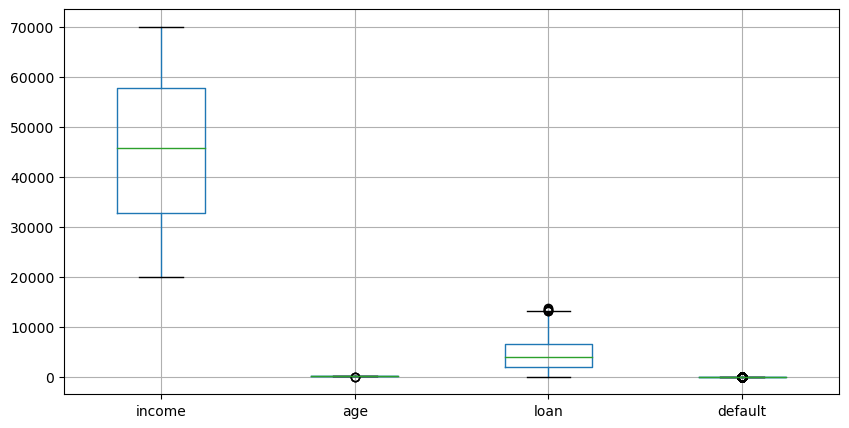

In [14]:
df.boxplot(figsize=(10,5))

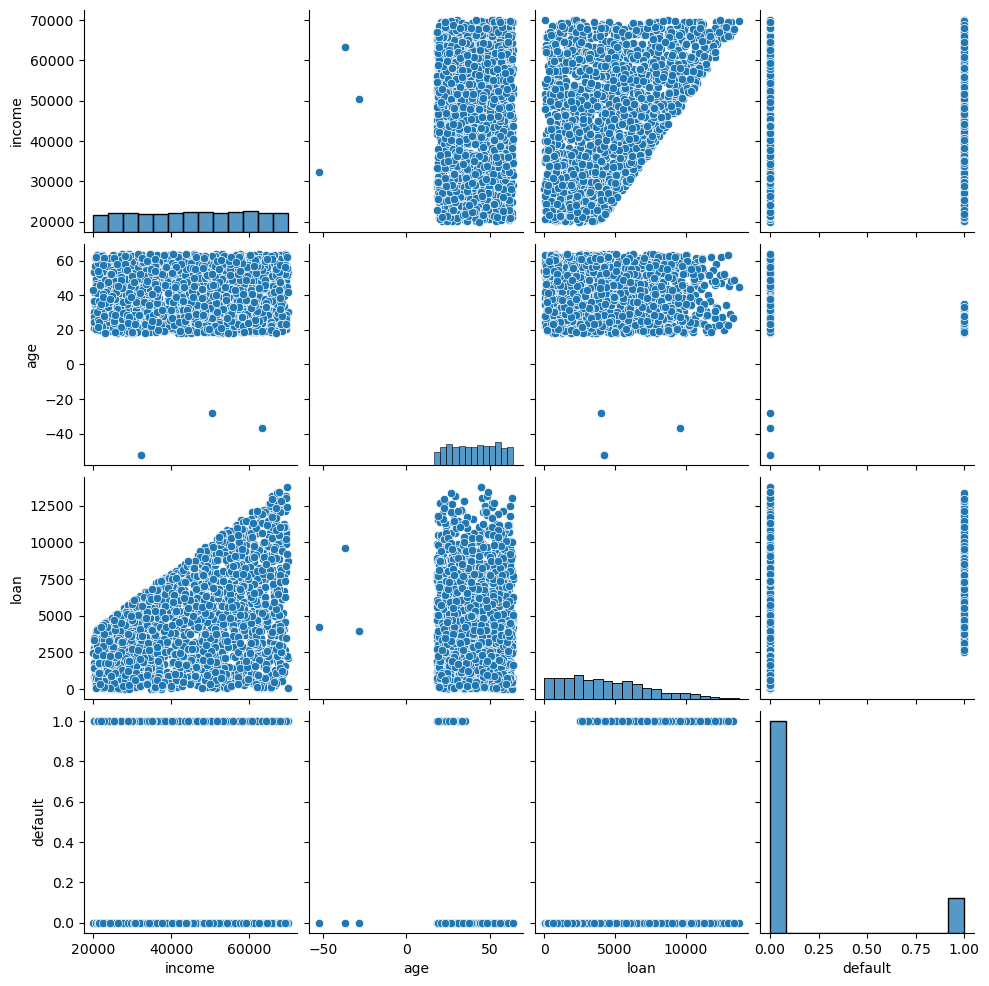

In [15]:
sns.pairplot(df)

# Assign X and Y

In [16]:
df.head(2)

,income,age,loan,default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0


In [17]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:].values

print('X Shape:\t',x.shape)
print()
print('Y Shape:\t',y.shape)

X Shape:	 (2000, 3)

Y Shape:	 (2000, 1)


# Spliting data for training and testing

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=2)

print('*'*30 + 'Training data' + '*'*30)
print('Training data-X- shape: \t',xtrain.shape)
print()
print('Training data-Y- shape: \t',ytrain.shape)
print()
print('*'*30 + 'Testing data' + '*'*30)
print()
print('Training data-(X-Input)-shape: \t',xtest.shape)
print()
print('Training data-(Y-outcome)-shape: \t',ytest.shape)

******************************Training data******************************
Training data-X- shape: 	 (1600, 3)

Training data-Y- shape: 	 (1600, 1)

******************************Testing data******************************

Training data-(X-Input)-shape: 	 (400, 3)

Training data-(Y-outcome)-shape: 	 (400, 1)


# Building SVR model

# SVR with Non Linear kernel -rbf

In [19]:

#SVR with Non Linear kernel -rbf
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
support_reg = SVR()
print('*'*75)
print('Hyperparameter:\n',support_reg.get_params())
print('*'*75)

#Train Phase
support_reg.fit(xtrain,ytrain)

#Testing Phase
ypred = support_reg.predict(xtest)
print('Predicted Price:\n',ypred)
print('*'*75)

#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

***************************************************************************
Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
***************************************************************************
Predicted Price:
 [0.10034719 0.1002004  0.10012369 0.09981331 0.10024422 0.10023036
 0.09962603 0.1001835  0.09991647 0.09999551 0.10046616 0.09980317
 0.1001577  0.10001627 0.10024312 0.10022002 0.10004484 0.09992501
 0.09973535 0.10008418 0.09998492 0.09973777 0.09998989 0.09991971
 0.10007626 0.10016797 0.10001328 0.10005087 0.10034446 0.10007956
 0.10007692 0.1001865  0.10015687 0.09999633 0.10002197 0.10017705
 0.10014601 0.09990847 0.10017471 0.09997385 0.09972298 0.10014722
 0.10044859 0.09982616 0.10013593 0.10005697 0.10015401 0.09987129
 0.09993995 0.09974635 0.09975381 0.10012004 0.10002412 0.10017854
 0.09999679 0.10009373 0.09984364 0

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# SVR with Non Linear kernel -linear

In [20]:
support_reg = SVR(kernel = 'linear')
print('*'*75)
print('Hyperparameter:\n',support_reg.get_params())
print('*'*75)

#Train Phase
support_reg.fit(xtrain,ytrain)

#Testing Phase
ypred = support_reg.predict(xtest)
print('Predicted Price:\n',ypred)
print('*'*75)

#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

***************************************************************************
Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
***************************************************************************


C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted Price:
 [-2.08901591e+02  1.72246425e+02 -2.44570796e+02  4.65435472e+01
 -1.24670788e+02  4.08963281e+02 -1.24493451e+02 -3.60265524e+01
  7.85357189e+01  2.18725717e+02 -4.34075231e+01  1.32551519e+02
  5.64008440e+02  3.76281208e+02  5.30493766e+02  5.36979123e+02
  4.81867596e+02  4.41887887e+01 -2.25279261e+02  2.48336986e+02
  1.90440420e+02 -2.15060981e+02 -3.02319358e+02 -8.48223216e+01
  3.88018562e+02  6.55363068e+02  2.20922047e+02  3.85996801e+02
  8.78410207e+02  1.96900848e+02  4.86895902e+01  2.03794967e+02
 -2.87172617e+02  2.89535916e+02  1.09840841e+02  5.87102769e+02
 -6.52769830e+01  1.91644513e+02  2.61403402e+02  2.32333415e+02
 -1.28519874e+02 -1.09786737e+02  1.37073202e+01  5.16607156e+01
 -8.36541634e+01  3.74623985e+02  5.57669907e+02  6.18929408e+01
  1.38160739e+01 -5.23085654e+01 -4.86324844e+01  5.15488604e+02
  3.56230801e+02  1.09052647e+02  4.49022065e+02  1.61347343e+02
  5.84714055e+01 -2.05271526e+02  2.28001410e+02  4.97400033e+02
 -2.585

# SVR with Non Linear Kernel -sigmoid

In [21]:
support_reg = SVR(kernel ='sigmoid')
print('*'*75)
print('Hyperparameter:\n',support_reg.get_params())
print('*'*75)

#Train Phase
support_reg.fit(xtrain,ytrain)

#Testing Phase
ypred = support_reg.predict(xtest)
print('Predicted Price:\n',ypred)
print('*'*75)

#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

***************************************************************************
Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
***************************************************************************


C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted Price:
 [ 45.19879073 -30.23542304  50.37899904   2.30801368  49.46365757
 -30.0393937   25.91280891  51.49283474  37.54433399  -2.4331416
  44.57052579  35.05034206 -23.01985543 -58.40583808 -33.95009777
 -53.06056122 -65.26816148  46.60811948  47.28997418  -8.48042194
   2.53055684  46.2104767   51.46918823  48.13113335 -14.2018988
 -62.2721743  -34.35010306 -19.90941115 -61.64465295 -67.46353569
  49.48019945 -50.76533047  49.47027331 -62.68040919 -40.04770648
 -50.9226224   51.54622171  35.15473189 -34.50424568 -69.59972161
  41.24158415  51.49519532  46.7380161   22.55995117  51.54463652
 -32.96106204 -64.98734621  40.80445974  44.99907185  34.19833256
  33.84764682 -10.34343565 -48.33907641 -38.99395603 -27.77289345
 -16.21584129  12.80592177  51.40132854 -10.95356504 -66.63589755
  48.06196759  51.4998206   44.71233442 -62.26362288  32.58477485
 -73.29063595 -69.63947807 -11.16752497  50.422623   -39.41964186
 -22.52480051  15.3468544   35.64096806 -16.25171419  -5.273